In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
from plot_functions import *
import sys
import os

In [3]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from selection_function_library import *
from direvo_functions import *
from param_sampler import *

### Figure 2 - Investigating the performance of selection functions in directed evolution

Fig 2A

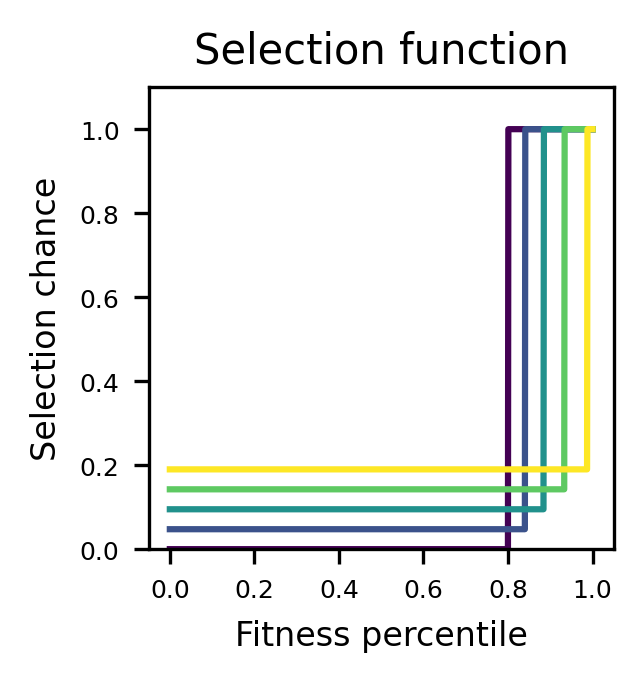

In [53]:
thresholds, base_chances = base_chance_threshold_fixed_prop([0,0.19], 0.2, 5)

params = [{'threshold': x, 'base_chance': y} for x,y in zip(thresholds, base_chances)]

plt.figure(figsize=(2,2), dpi=300)
cmap = cm.get_cmap('viridis', len(params))
for n,i in enumerate(params):
    selection_function_plotter(base_chance_threshold_select, i, label = f"Threshold: {i['threshold']:.2f}, Base chance: {i['base_chance']:.2f}", color=cmap(n))
plt.show()

Fig 2B

In [8]:
with open('/home/jess-pc/Documents/results/NK_grid_post_review2.pkl', 'rb') as f:
    results = pickle.load(f)

In [9]:
prop = 0.2
params = base_chance_threshold_fixed_prop([0, prop], prop, num_samples=10)
optimal_threshold = np.array([params[0][i] for i in jnp.argmax(results, axis=1)])
optimal_base_chance = np.array([params[1][i] for i in jnp.argmax(results, axis=1)])

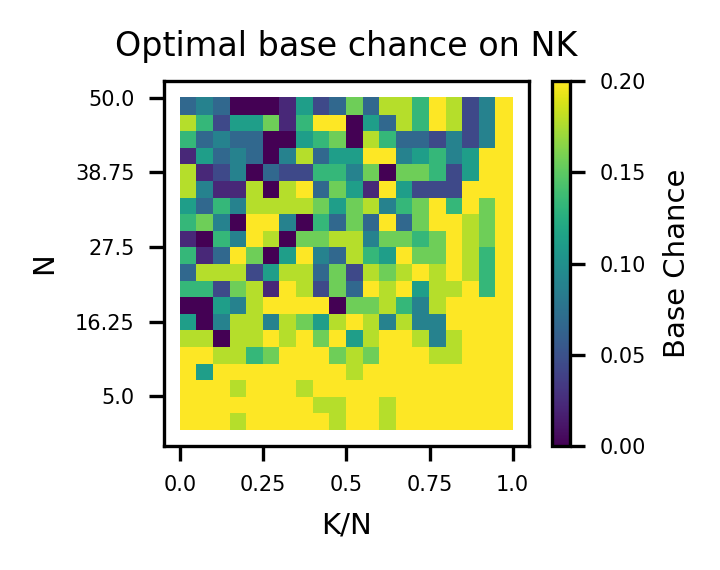

In [11]:
plt.figure(figsize=(2.5,2),dpi=300)

num_steps = 20

optimal_base_chanceT = optimal_base_chance.reshape(num_steps,num_steps).T

tripcolor = quatromatrix(optimal_base_chanceT, optimal_base_chanceT, optimal_base_chanceT, optimal_base_chanceT)
plt.ylabel('N', fontsize=7)
plt.xlabel('K/N', fontsize=7)

x_ticks = np.linspace(0, 1, num=5)
y_ticks = np.linspace(5, 50, num=5)
plt.gca().set_xticks(x_ticks*20)
plt.gca().set_yticks(y_ticks*20/50)
plt.gca().set_xticklabels(x_ticks, fontsize=5)
plt.gca().set_yticklabels(y_ticks, fontsize=5)

cbar = plt.colorbar(tripcolor)
cbar.ax.set_ylabel('Base Chance', fontsize=7)
cbar.ax.tick_params(labelsize=5)

plt.title('Optimal base chance on NK', fontsize=8)

plt.tight_layout()  # Ensure the graph uses the whole axes

plt.show()

Fig 2C

In [53]:
with open('/home/jess-pc/Documents/results/to_send_mutty2.pickle', 'rb') as f:
    data = pickle.load(f)

In [54]:
with open('/home/jess-pc/Documents/results/mut_run_june.pickle', 'rb') as f:
    data = pickle.load(f)

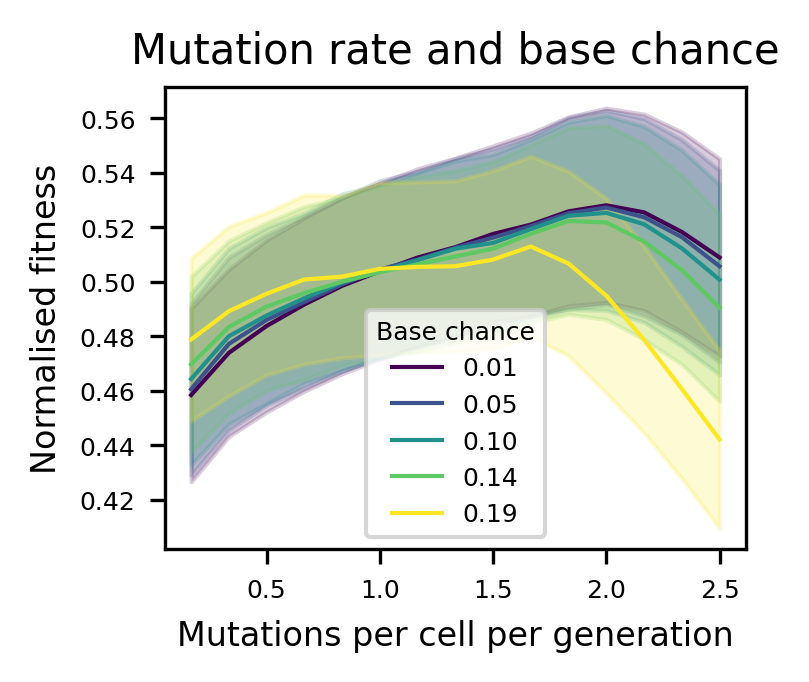

In [58]:
plt.figure(figsize=(2.5,2),dpi=300)

colormap = plt.cm.get_cmap('viridis', 5)

mean_values = (data['results_mean'][0,0,0,5:,0,1:16,-1])/48
variance_values = data['results_sq_mean'][0,0,0,5:,0,1:16,-1] - (data['results_mean'][0,0,0,5:,0,1:16,-1])**2
std_dev = np.sqrt(variance_values)/48

x_values = data['dim details'][5][1:16]

for n, (mean, std) in enumerate(zip(mean_values, std_dev)):
    plt.plot(x_values, mean, label="{:0.2f}".format(data['dim details'][3][n+5][1]), color=colormap(n), linewidth=1)
    plt.fill_between(x_values, mean - std, mean + std, color=colormap(n), alpha=0.2)

plt.ylabel('Normalised fitness', fontsize=8)
plt.xlabel('Mutations per cell per generation', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=6)

import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=0.2)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
#cbar = plt.colorbar(sm, fraction=0.05, pad=0.05)
cbar.set_label('Base Chance', rotation=270, labelpad=15, fontsize=8)
plt.title('Mutation rate and base chance', fontsize=10)

plt.legend(title='Base chance', fontsize=6, title_fontsize=6)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(2.5,2),dpi=300)

colormap = plt.cm.get_cmap('viridis', 5)

# Assuming data['results_variance'] holds your variance values
mean_values = (data['results_mean'][0,0,:45,5:,0,0,-1].T)/44
variance_values = data['results_sq_mean'][0,0,:45,5:,0,0,-1].T - (data['results_mean'][0,0,:45,5:,0,0,-1].T)**2
std_dev = np.sqrt(variance_values)/44

x_values = np.log(data['dim details'][2][:45])

for n, (mean, std) in enumerate(zip(mean_values, std_dev)):
    plt.plot(x_values, mean, label="{:0.2f}".format(data['dim details'][3][n+5][1]), color=colormap(n), linewidth=1)
    plt.fill_between(x_values, mean - std, mean + std, color=colormap(n), alpha=0.2)

plt.ylabel('Normalised fitness', fontsize=8)
plt.xlabel('Log10 population size', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=6)

import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=0.2)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
#cbar = plt.colorbar(sm, fraction=0.05, pad=0.05)
cbar.set_label('Base Chance', rotation=270, labelpad=15, fontsize=8)
plt.title('Population size and base chance', fontsize=10)

plt.legend(title='Base chance', fontsize=6, title_fontsize=6)
plt.show()

Fig 2C

In [55]:
with open('/home/jess-pc/Documents/results/to_send_pop2.pickle', 'rb') as f:
    data = pickle.load(f)

In [94]:
with open('/home/jess-pc/Documents/results/pop_run_june.pickle', 'rb') as f:
    data = pickle.load(f)

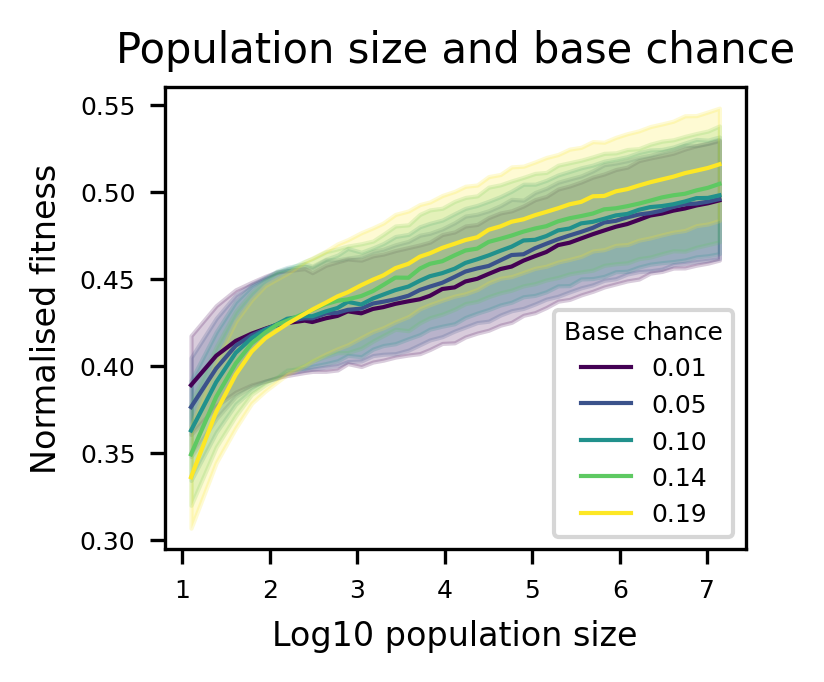

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(2.5,2),dpi=300)

colormap = plt.cm.get_cmap('viridis', 5)

# Assuming data['results_variance'] holds your variance values
mean_values = (data['results_mean'][0,0,:45,5:,0,0,-1].T)/44
variance_values = data['results_sq_mean'][0,0,:45,5:,0,0,-1].T - (data['results_mean'][0,0,:45,5:,0,0,-1].T)**2
std_dev = np.sqrt(variance_values)/44

x_values = np.log(data['dim details'][2][:45])

for n, (mean, std) in enumerate(zip(mean_values, std_dev)):
    plt.plot(x_values, mean, label="{:0.2f}".format(data['dim details'][3][n+5][1]), color=colormap(n), linewidth=1)
    plt.fill_between(x_values, mean - std, mean + std, color=colormap(n), alpha=0.2)

plt.ylabel('Normalised fitness', fontsize=8)
plt.xlabel('Log10 population size', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=6)

import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=0.2)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
#cbar = plt.colorbar(sm, fraction=0.05, pad=0.05)
cbar.set_label('Base Chance', rotation=270, labelpad=15, fontsize=8)
plt.title('Population size and base chance', fontsize=10)

plt.legend(title='Base chance', fontsize=6, title_fontsize=6)
plt.show()


### Figure 3 - Investigating the effects of population splitting in directed evolution

3A

In [134]:
params = {'threshold': 0.95, 'base_chance' : 0.00}

popsize=500
split=5
N=25
K=5
#rng=jr.PRNGKey(22)
rng=jr.PRNGKey(1999)

no_splits = directedEvolution(rng, N=N, K=K, selection_strategy=base_chance_threshold_select, selection_params = params, popsize=popsize, mut_chance=0.01, num_steps=100, num_reps=1, define_i_pop=None, average=True)

splits = []
split_rngs = jr.split(rng, split)
for i in split_rngs:
    out_split = directedEvolution(i, N=N, K=K, selection_strategy=base_chance_threshold_select, selection_params = params, popsize=int(popsize/split), mut_chance=0.01, num_steps=100, num_reps=1, define_i_pop=None, average=True)
    splits.append(out_split)

# For fitness plot.
split1 = jnp.array(no_splits['fitness'][0])
splits5 = jnp.array([i['fitness'][0] for i in splits])
splits5 = np.hstack(tuple(splits5))

# For PCA.
no_split_p = jnp.array(no_splits['pop'][0])
split_p = jnp.array([i['pop'][0] for i in splits])
split_p = np.hstack(tuple(split_p))


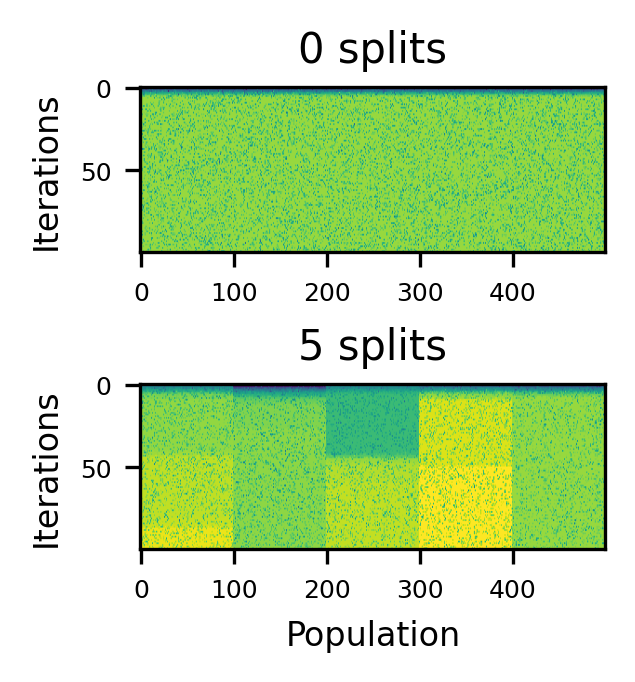

In [135]:
minimum = min(split1.min(), splits5.min())
maximum = max(split1.max(), splits5.max())

fig, axs = plt.subplots(2, 1, figsize=(2,2), dpi=300)
axs[0].imshow(split1, vmin=minimum, vmax=maximum, aspect='auto')  # Adjust aspect
axs[0].set_title('0 splits', fontsize=10)
axs[0].set_ylabel('Iterations', fontsize=8)
axs[0].set_xlabel('')
axs[0].tick_params(axis='both', which='major', labelsize=6)

axs[1].imshow(splits5, vmin=minimum, vmax=maximum, aspect='auto')  # Adjust aspect
axs[1].set_title('5 splits', fontsize=10)
axs[1].set_ylabel('Iterations', fontsize=8)
axs[1].set_xlabel('Population', fontsize=8)
axs[1].tick_params(axis='both', which='major', labelsize=6)

plt.subplots_adjust(hspace=0.8)  # Adjust hspace as needed
plt.show()

3B

In [136]:
from sklearn.decomposition import NMF

#all_lineages = jnp.concatenate([ns_lineage, s_lineage], axis=0)
p = jnp.concatenate([no_split_p, split_p], axis=1)

model = NMF(n_components=2, init='random', random_state=0)
X = model.fit_transform(p[-1])

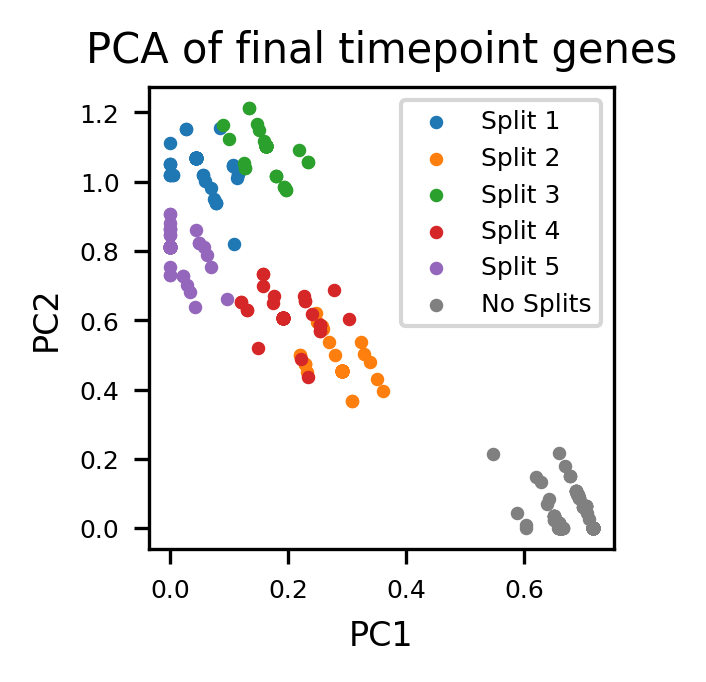

In [137]:
plt.figure(figsize=(2,2), dpi=300)

f = jnp.concatenate([split1[-1,:], splits5[-1,:]])

# Split the coordinates into blocks of 100
blocks = [X[i:i+100] for i in range(500, len(X), 100)]

# Create an empty list to store the scatter objects
scatter_list = []

# Iterate over each block of points and plot them with a different color
for i, block in enumerate(blocks):
    coords = jnp.array(block)
    color = plt.cm.tab10(i)  # Use a colormap to select the color
    scatter = plt.scatter(coords[:, 0], coords[:, 1], color=color,s=5)
    scatter_list.append(scatter)

# Plot the separate scatter plot
coords_y = jnp.array(X[:499])
color_y = 'grey'  # Color for the separate scatter plot
scatter_y = plt.scatter(coords_y[:, 0], coords_y[:, 1], color=color_y,s=5)
scatter_list.append(scatter_y)

# Create a legend based on the scatter objects
labels = [f'Split {i+1}' for i in range(len(blocks))] + ['No Splits']
plt.legend(scatter_list, labels, loc = 'best', fontsize=6)

plt.title('PCA of final timepoint genes', fontsize=10)
plt.xlabel('PC1', fontsize=8)
plt.ylabel('PC2', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=6)

# Show the plot
plt.show()

3C

In [193]:
## Hamming distances matrix.

def hamming_distance_matrix(binary_arrays):
    num_arrays = len(binary_arrays)
    distances = [[0] * num_arrays for _ in range(num_arrays)]

    for i in range(num_arrays):
        for j in range(i + 1, num_arrays):
            if len(binary_arrays[i]) != len(binary_arrays[j]):
                raise ValueError("Binary arrays must have the same length")

            # Calculate Hamming distance
            dist = sum(el1 != el2 for el1, el2 in zip(binary_arrays[i], binary_arrays[j]))
            
            # Store distance in both symmetric positions
            distances[i][j] = dist/25
            distances[j][i] = dist/25

    return distances

In [194]:
distances = hamming_distance_matrix(split_p[-1,:,:])

Text(0.5, 1.0, 'Split Hamming distances')

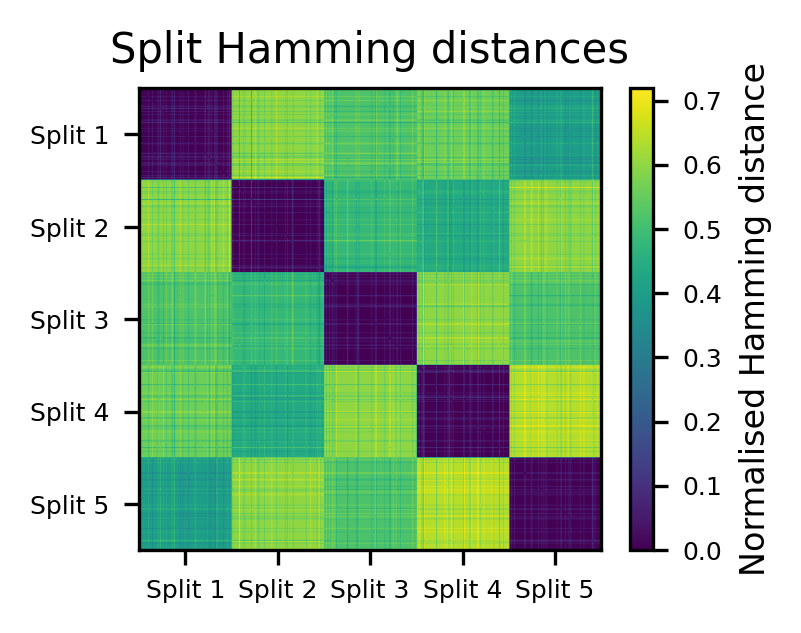

In [198]:
plt.figure(figsize=(2.5,2), dpi=300)

plt.imshow(distances)

tick_positions = np.array([50,150,250,350,450])
ytick_labels = np.array(['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5'])
xtick_labels = np.array(['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5'])

# Set the tick positions and labels
plt.yticks(tick_positions, ytick_labels)
plt.xticks(tick_positions, xtick_labels)
plt.tick_params(axis='both', which='major', labelsize=6)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Normalised Hamming distance', fontsize=8)
cbar.ax.tick_params(labelsize=6)

plt.title('Split Hamming distances', fontsize=10)

3D

In [50]:
with open('/home/jess-pc/Documents/results/pop_splits_5.pkl', 'rb') as f:
    results = pickle.load(f)

In [23]:
with open('/home/jess-pc/Documents/results/pop_splits_new_NK.pkl', 'rb') as f:
    results = pickle.load(f)

In [316]:
def NK_grid(N_range, num_samples=20):
    N = jnp.linspace(N_range[0], N_range[1], num=num_samples)
    K = jnp.array([jnp.linspace(1, i, num_samples)
                  for i in N]).reshape(num_samples, num_samples)
    N = jnp.repeat(N, num_samples).reshape(num_samples, num_samples)
    return N, K


params = {'threshold': 0.95, 'base_chance': 0.01}

rng_key = jr.PRNGKey(42)
rng_list = jr.split(rng_key, 10)

N_list = NK_grid([10, 20], num_samples=5)[0].flatten()
K_list = NK_grid([10, 20], num_samples=5)[1].flatten()

In [325]:
N_list

Array([10. , 10. , 10. , 10. , 10. , 12.5, 12.5, 12.5, 12.5, 12.5, 15. ,
       15. , 15. , 15. , 15. , 17.5, 17.5, 17.5, 17.5, 17.5, 20. , 20. ,
       20. , 20. , 20. ], dtype=float32)

In [318]:
K_list

Array([ 1.   ,  3.25 ,  5.5  ,  7.75 , 10.   ,  1.   ,  3.875,  6.75 ,
        9.625, 12.5  ,  1.   ,  4.5  ,  8.   , 11.5  , 15.   ,  1.   ,
        5.125,  9.25 , 13.375, 17.5  ,  1.   ,  5.75 , 10.5  , 15.25 ,
       20.   ], dtype=float32)

In [323]:
results[0].shape

(10, 25, 10, 512)

In [51]:
NK_mean_results = []
for i in results:
    NK_mean_results.append(np.array(i)[:,:,:,:].mean(axis=(2)))

In [52]:
result_512 = np.vstack(NK_mean_results[0])
result_256 = np.vstack(NK_mean_results[1])
result_128 = np.vstack(NK_mean_results[2])
result_64 = np.vstack(NK_mean_results[3])
result_32 = np.vstack(NK_mean_results[4])
result_16 = np.vstack(NK_mean_results[5])
result_8 = np.vstack(NK_mean_results[6])
result_4 = np.vstack(NK_mean_results[7])
result_2 = np.vstack(NK_mean_results[8])

In [54]:
## To look at all combos.

def split_sampler(rng, pop, s):
    return jnp.hstack(jr.choice(rng, pop, (s,)))

grid = np.empty((9,9))
grid[:] = np.nan

rng = jr.PRNGKey(42)
results_list = [result_2, result_4, result_8, result_16, result_32, result_64, result_128, result_256, result_512]

all_results = []

for i, p in enumerate(range(len(results_list))):

    splits = []

    for ii, sub_p in enumerate(range(0,9-p)):

        split_reps = []

        for r in jr.split(rng,50):

            split_reps.append(split_sampler(r, results_list[p], 2**sub_p).max())

        grid[i+ii,ii] = jnp.array(split_reps).mean()

Text(0.5, 1.0, 'Split mean performance')

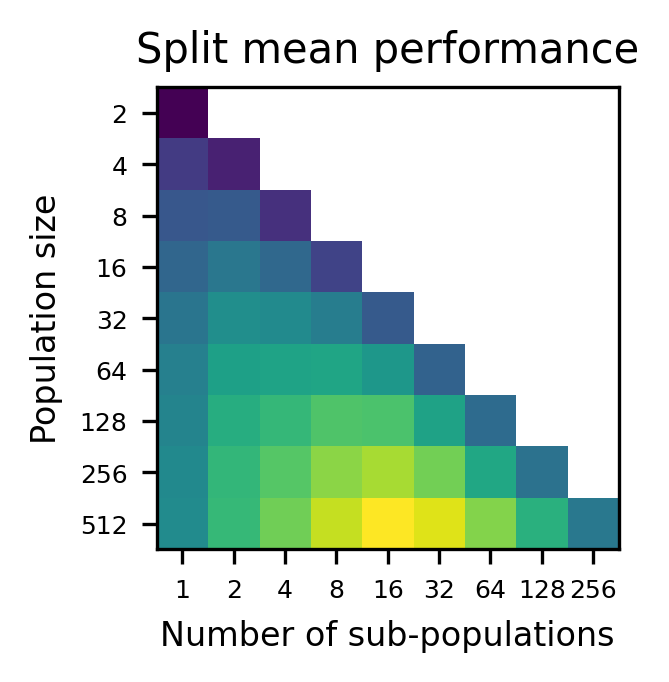

In [55]:
plt.figure(figsize=(2,2), dpi=300)
plt.imshow(jnp.array(grid))
plt.ylabel('Population size', fontsize=8)
plt.xlabel('Number of sub-populations', fontsize=8)
tick_positions = np.array([0, 1, 2, 3, 4, 5, 6, 7,8])
ytick_labels = np.array([2,4,8,16,32,64,128,256,512])
xtick_labels = np.array([2**i for i in range(9)])

# Set the tick positions and labels
plt.yticks(tick_positions, ytick_labels)
plt.xticks(tick_positions, xtick_labels)
plt.tick_params(axis='both', which='major', labelsize=6)

plt.title('Split mean performance', fontsize=10)

3E

In [56]:
rng = jr.PRNGKey(42)
results_list = [result_2, result_4, result_8, result_16, result_32, result_64, result_128, result_256, result_512]

all_results = []

for p in range(len(results_list)):

    split_reps = []

    for r in jr.split(rng, 500):

        split_reps.append(split_sampler(r, results_list[p], 2**(8-p)).max())

    all_results.append(split_reps)

all_results = jnp.array(all_results)

In [57]:
all_results.max()

Array(37.479935, dtype=float32)

Text(0.5, 1.0, 'Split performance distributions (total size = 512)')

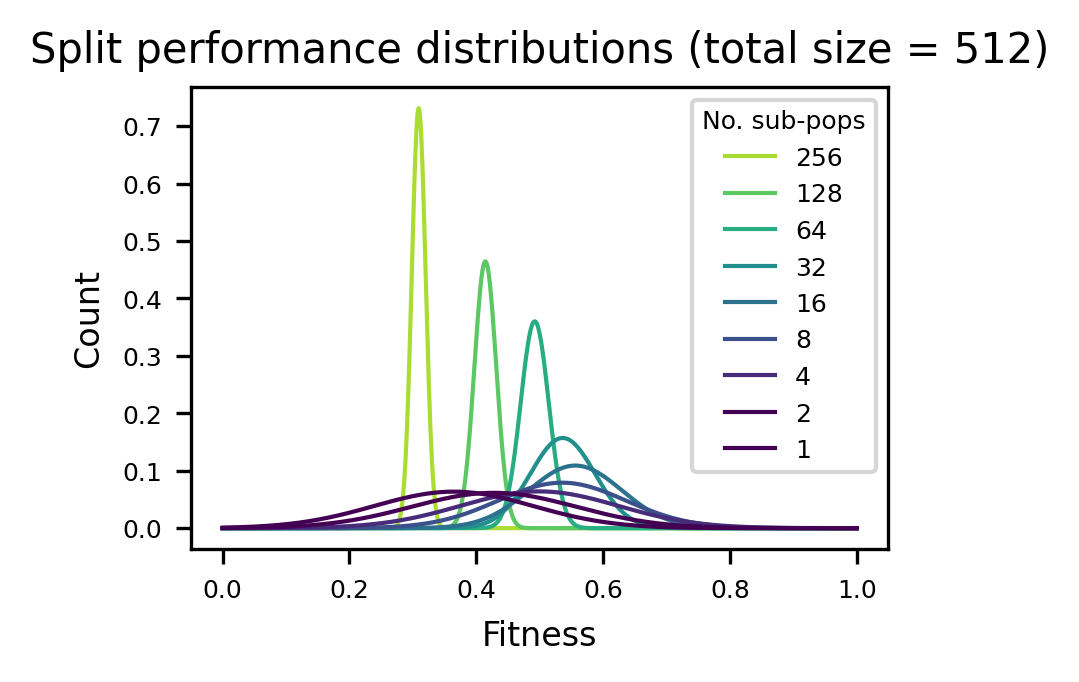

In [59]:
from scipy.stats import norm

plt.figure(figsize=(3,2), dpi=300)
colormap = plt.cm.get_cmap('viridis_r', 9)

split_labels = [256, 128, 64, 32, 16, 8, 4, 2, 1]
for n,i in enumerate(all_results):
    x = jnp.linspace(0,50,num=1000)
    mean = i.mean()
    std = i.std()
    y=norm.pdf(x, mean, std)
    plt.plot(x/50, y, label=split_labels[n], color = colormap(n+1), linewidth=1)

plt.tick_params(axis='both', which='major', labelsize=6)
plt.legend(title = 'No. sub-pops', fontsize=6, title_fontsize=6)
plt.xlabel('Fitness', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.title('Split performance distributions (total size = 512)', fontsize=10)

### Figure 4 - Optimisation of multi-dimensional selection

4A

In [31]:
with open("/home/jess-pc/Documents/results/flowvmic_flow_.pickle", "rb") as f:
    resulty_flow = pickle.load(f)
    
with open("/home/jess-pc/Documents/results/flowvmic_micro_.pickle", "rb") as f:
    resulty_ours = pickle.load(f)

In [32]:
flow_max = resulty_flow['results']['fitness'].max()
our_max = resulty_ours['results']['fitness'].max()

In [33]:
flow_mean = resulty_flow['results']['fitness'][0,1,1,1,0,:,:,:,:].mean(axis=(0,1,2))/flow_max
flow_std = resulty_flow['results']['fitness'][0,1,1,1,0,:,:,:,:].std(axis=(0,1,2))/flow_max

our_mean = resulty_ours['results']['fitness'][0,1,1,1,0,:,:,:,:].mean(axis=(0,1,2))/our_max
our_std = resulty_ours['results']['fitness'][0,1,1,1,0,:,:,:,:].std(axis=(0,1,2))/our_max

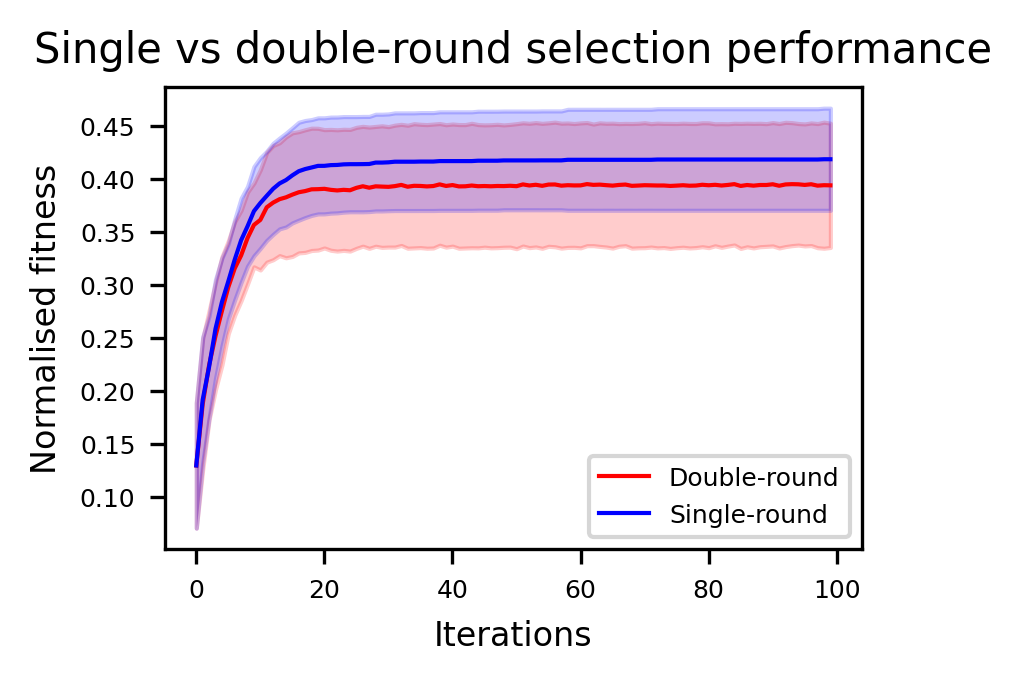

In [34]:
x = np.arange(len(flow_mean))

plt.figure(figsize=(3,2), dpi=300)

# Plotting flow_mean with its standard deviation
plt.plot(x, flow_mean, label='Double-round', color='red', linewidth=1)
plt.fill_between(x, flow_mean - flow_std, flow_mean + flow_std, color='red', alpha=0.2)

# Plotting our_mean with its standard deviation
plt.plot(x, our_mean, label='Single-round', color='blue', linewidth=1)
plt.fill_between(x, our_mean - our_std, our_mean + our_std, color='blue', alpha=0.2)

# Adding labels and title
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Normalised fitness', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=6)
plt.title('Single vs double-round selection performance', fontsize=10)
plt.legend(fontsize=6)

# Display the plot
plt.show()


There where 40 selected in the first ordering
The agreement is 0.2750000059604645


Text(0.5, 1.0, 'Single vs double-round selection')

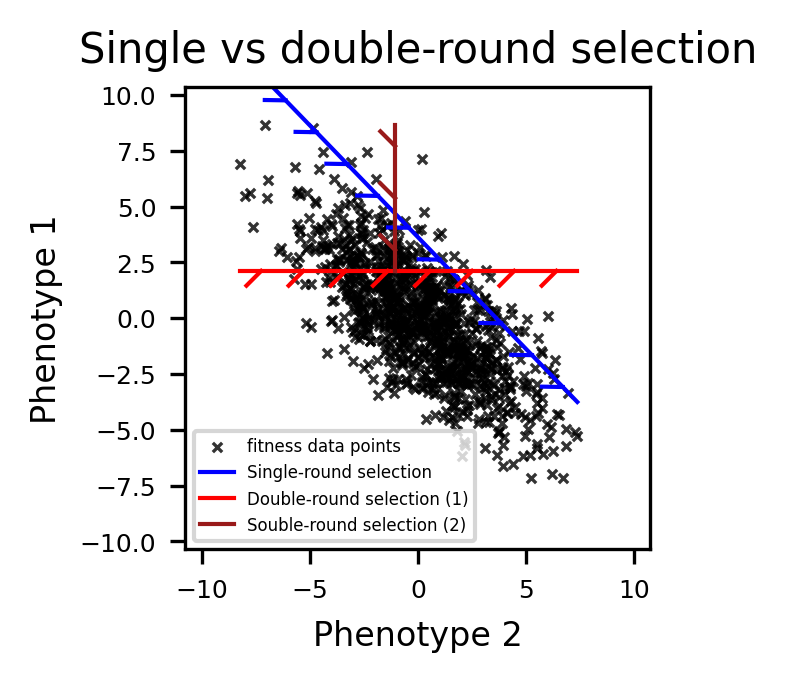

In [373]:
from matplotlib import patheffects

distribution_matrix = jnp.array([[1,2.5],
                                 [1,-2.5]])

true_scoring = jnp.array([1,1])

r_data = distribution_matrix@jr.normal(jr.PRNGKey(10), shape=(2,1000))
plt.style.use("default")

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi=300)
plt.scatter(r_data[0], r_data[1], marker="x", color="black", alpha = 0.8, label = "fitness data points",
            linewidths = 0.8, s=5)


lim_1 = 80
lim_2 = 90

comb_score = true_scoring @ r_data
perc_limit = 100-100*((100 - lim_1)/100)**2
score_perc = jnp.percentile(comb_score, perc_limit)

locations_true = comb_score > score_perc
xs = jnp.linspace(jnp.min(r_data[0]), jnp.max(r_data[0]), 100)
xs = xs[::-1]
ax.plot(xs, (score_perc - xs*true_scoring[0])/true_scoring[1], color=(0,0,1,1), label = "Single-round selection",
        path_effects=[patheffects.withTickedStroke(length=0.5)], linewidth = 1)



perc_line = jnp.percentile(r_data[1], lim_1)

ax.plot([ jnp.max(r_data[0]),jnp.min(r_data[0])], [perc_line,perc_line], color=(1,0.0,0,1)
        , label = "Double-round selection (1)", path_effects=[patheffects.withTickedStroke(length=0.5)], linewidth = 1)

inds = np.where(r_data[1] > perc_line)
filted_data = r_data[0][inds]

perc_line_x = jnp.percentile(filted_data, lim_1)

ax.plot([perc_line_x,perc_line_x], [perc_line,jnp.max(r_data[1])], color=(0.6,0.1,0.1,1),
        label = "Souble-round selection (2)", path_effects=[patheffects.withTickedStroke(length=0.5)], linewidth = 1)

locations_first = (r_data[0] > perc_line_x) & (r_data[1] > perc_line)
num_selected = jnp.sum(locations_first)
print(f"There where {num_selected} selected in the first ordering")

agreement_first = jnp.sum(locations_first & locations_true)
print(f"The agreement is {agreement_first/num_selected}")

x_std = jnp.std(r_data[0])
y_std = jnp.std(r_data[1])
ax.set_xlim([-4*x_std,4*x_std])
ax.set_ylim([-4*y_std,4*y_std])
ax.set_xlabel("Phenotype 2", fontsize=8)
ax.set_ylabel("Phenotype 1", fontsize=8)

ax.tick_params(axis='both', which='major', labelsize=6)

ax.legend(loc = "lower left", fontsize=4)

ax.set_title("Single vs double-round selection", fontsize=10)

In [36]:
with open('/home/jess-pc/Documents/results/nk_mullti_diff_weight 1.pickle', 'rb') as f:
    data = pickle.load(f)

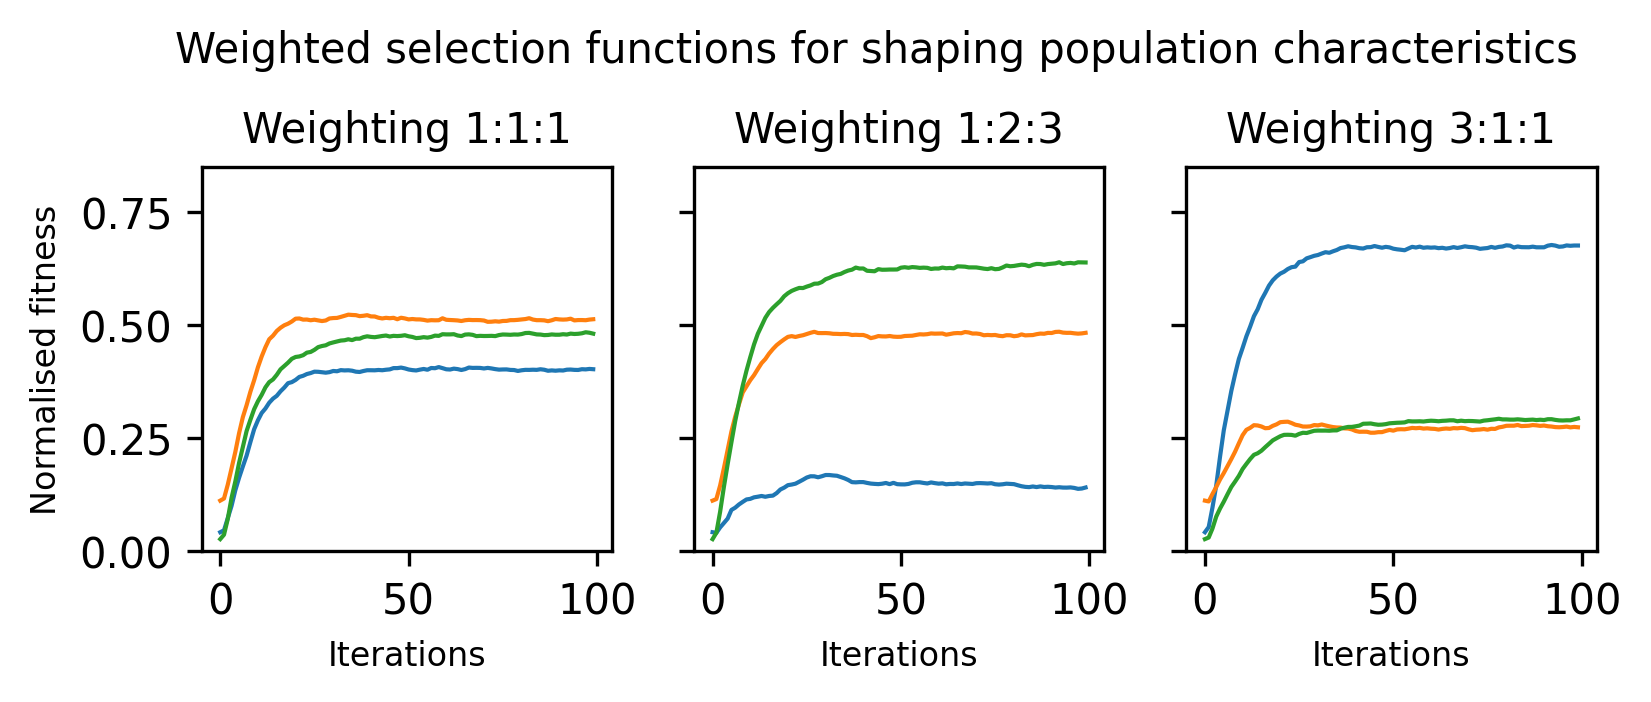

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=300)

titles = ['Weighting 1:1:1', 'Weighting 1:2:3', 'Weighting 3:1:1']

for i in range(3):
    for ii in range(3):
        axs[i].plot(data['results']['fitness breakdown'][3,1,1,1,0,i,:,:,:,:,ii].mean(axis=(0,1,2))/21.6, linewidth=1)
        axs[i].set_ylabel('Normalised fitness', fontsize=8)
        axs[i].set_xlabel('Iterations', fontsize=8)
        axs[i].set_title(titles[i], fontsize=10)
        axs[i].set_ylim(0,0.85)

fig.suptitle('Weighted selection functions for shaping population characteristics', fontsize=10)
plt.subplots_adjust(top=0.75)

for ax in axs.flat:
    ax.label_outer()

### GB1

In [23]:
with open('/home/jess-pc/Documents/results/GB1_array.pkl', 'rb') as f:
    GB1_array = pickle.load(f)

In [8]:
results_array_processed = GB1_array.max(axis=3).mean(axis=1)[:,-1]

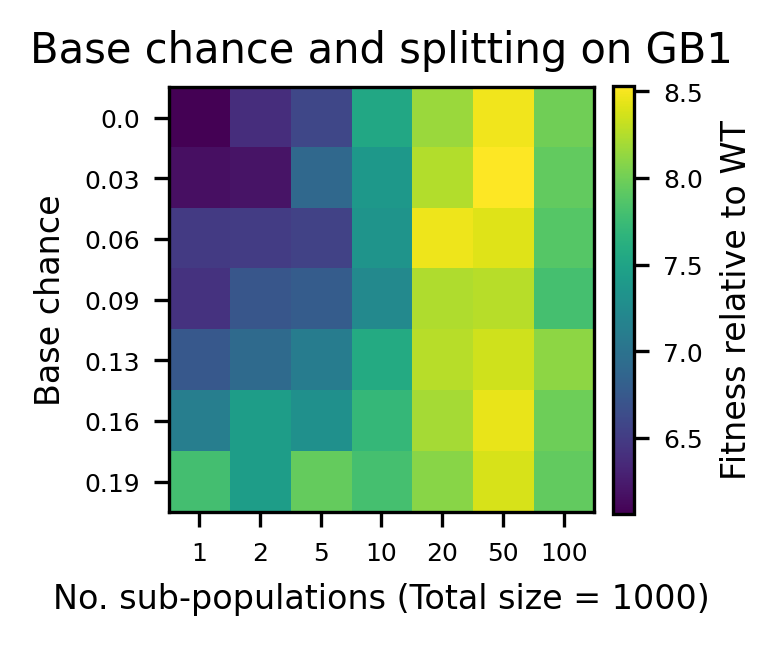

In [40]:
plt.figure(figsize=(2,2), dpi=300)
plt.imshow(results_array_processed.reshape(7,7))
plt.xticks([0, 1, 2, 3, 4, 5, 6],[1,2,5,10,20,50,100])
plt.yticks([0, 1, 2, 3, 4, 5, 6],[0.0, 0.03,0.06, 0.09,0.13,0.16,0.19])
plt.ylabel('Base chance', fontsize=8)
plt.xlabel('No. sub-populations (Total size = 1000)', fontsize=8)
plt.title('Base chance and splitting on GB1', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=6)
cbar = plt.colorbar(fraction=0.046,pad=0.04)
cbar.set_label('Fitness relative to WT', fontsize=8)
cbar.ax.tick_params(labelsize=6)

In [42]:
with open('/home/jess-pc/Documents/results/GB1_hist.pkl', 'rb') as f:
    GB1_hist = pickle.load(f)

In [43]:
results_processed = GB1_hist.max(axis=3)[:,:,-1]

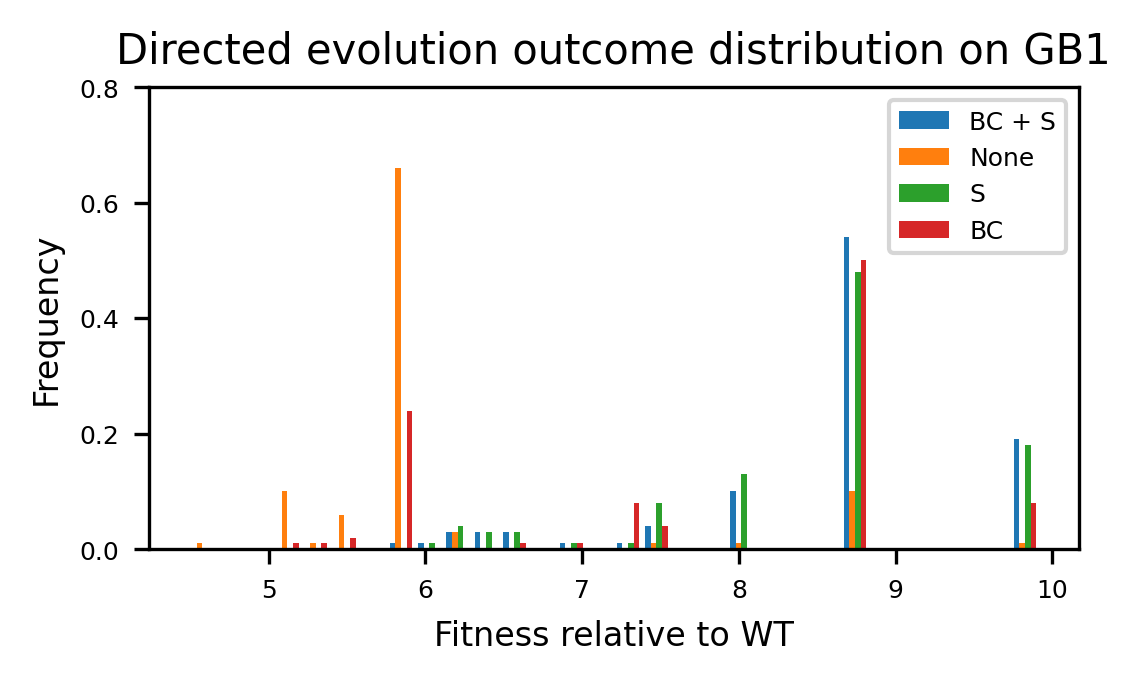

In [27]:
plt.figure(figsize=(4,2), dpi=300)
labels = ['BC + S', 'None', 'S', 'BC']
plt.hist([np.array(results_processed[0]), np.array(results_processed[1]), np.array(results_processed[2]), np.array(results_processed[3])], bins=30, label=labels)
plt.legend(fontsize=6)

# Divide tick locations (values) by 1000 and update tick labels accordingly
tick_locs, tick_labels = plt.yticks()
new_tick_labels = [(tick/100) for tick in tick_locs]
plt.yticks(tick_locs, new_tick_labels)
plt.ylabel('Frequency', fontsize=8)
plt.xlabel('Fitness relative to WT', fontsize=8)

plt.title('Directed evolution outcome distribution on GB1', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=6)

plt.show()

### TrpB

In [28]:
with open('/home/jess-pc/Documents/results/TrpB_array.pkl', 'rb') as f:
    TrpB_array = pickle.load(f)

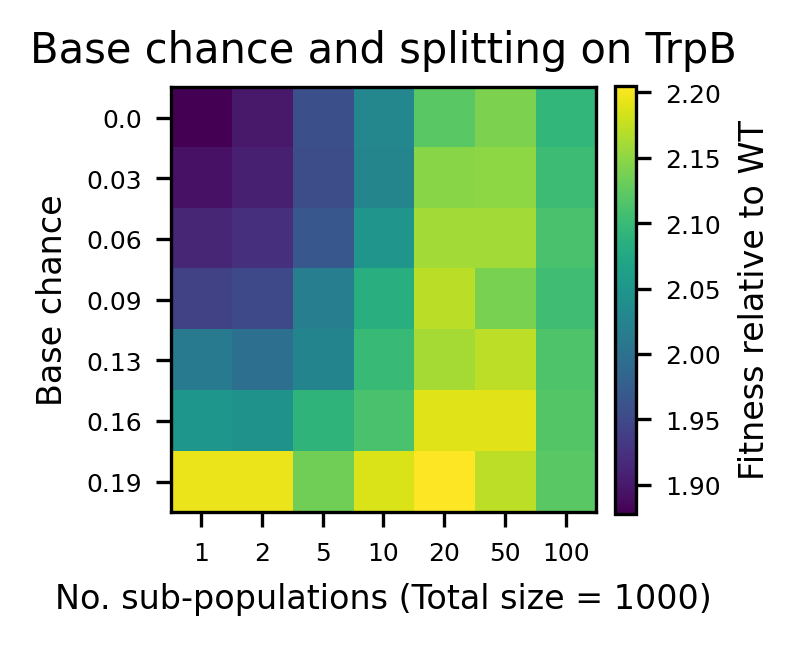

In [29]:
plt.figure(figsize=(2,2), dpi=300)
plt.imshow(TrpB_array.reshape(7,7)/0.4080739252340478)
plt.xticks([0, 1, 2, 3, 4, 5, 6],[1,2,5,10,20,50,100])
plt.yticks([0, 1, 2, 3, 4, 5, 6],[0.0, 0.03,0.06, 0.09,0.13,0.16,0.19])
plt.ylabel('Base chance', fontsize=8)
plt.xlabel('No. sub-populations (Total size = 1000)', fontsize=8)
plt.title('Base chance and splitting on TrpB', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=6)
cbar = plt.colorbar(fraction=0.046,pad=0.04)
cbar.set_label('Fitness relative to WT', fontsize=8)
cbar.ax.tick_params(labelsize=6)

In [30]:
with open('/home/jess-pc/Documents/results/TrpB_hist.pkl', 'rb') as f:
    TrpB_hist = pickle.load(f)

In [31]:
results_processed = TrpB_hist.max(axis=3)[:,:,-1]

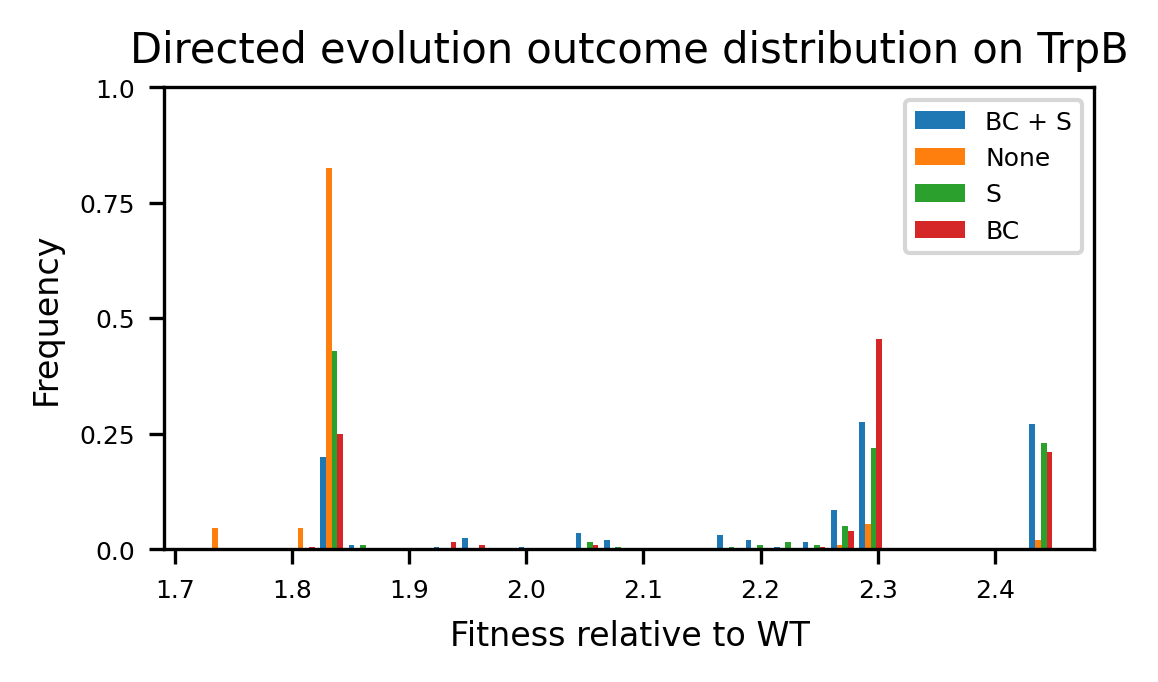

In [32]:
plt.figure(figsize=(4,2), dpi=300)
labels = ['BC + S', 'None', 'S', 'BC']
WT = 0.4080739252340478
plt.hist([np.array(results_processed[0])/WT, np.array(results_processed[1])/WT, np.array(results_processed[2])/WT, np.array(results_processed[3])/WT], bins=30, label=labels)
plt.legend(fontsize=6)

# Divide tick locations (values) by 1000 and update tick labels accordingly
tick_locs, tick_labels = plt.yticks()
new_tick_labels = [(tick/200) for tick in tick_locs]
plt.yticks(tick_locs, new_tick_labels)
plt.ylabel('Frequency', fontsize=8)
plt.xlabel('Fitness relative to WT', fontsize=8)

plt.title('Directed evolution outcome distribution on TrpB', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=6)

plt.show()

### Appendix Figures

NK plots

In [257]:
with open('/home/jess-pc/Documents/results/noise_NK_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [259]:
NKs = list(zip(data['ns'], data['ks']))

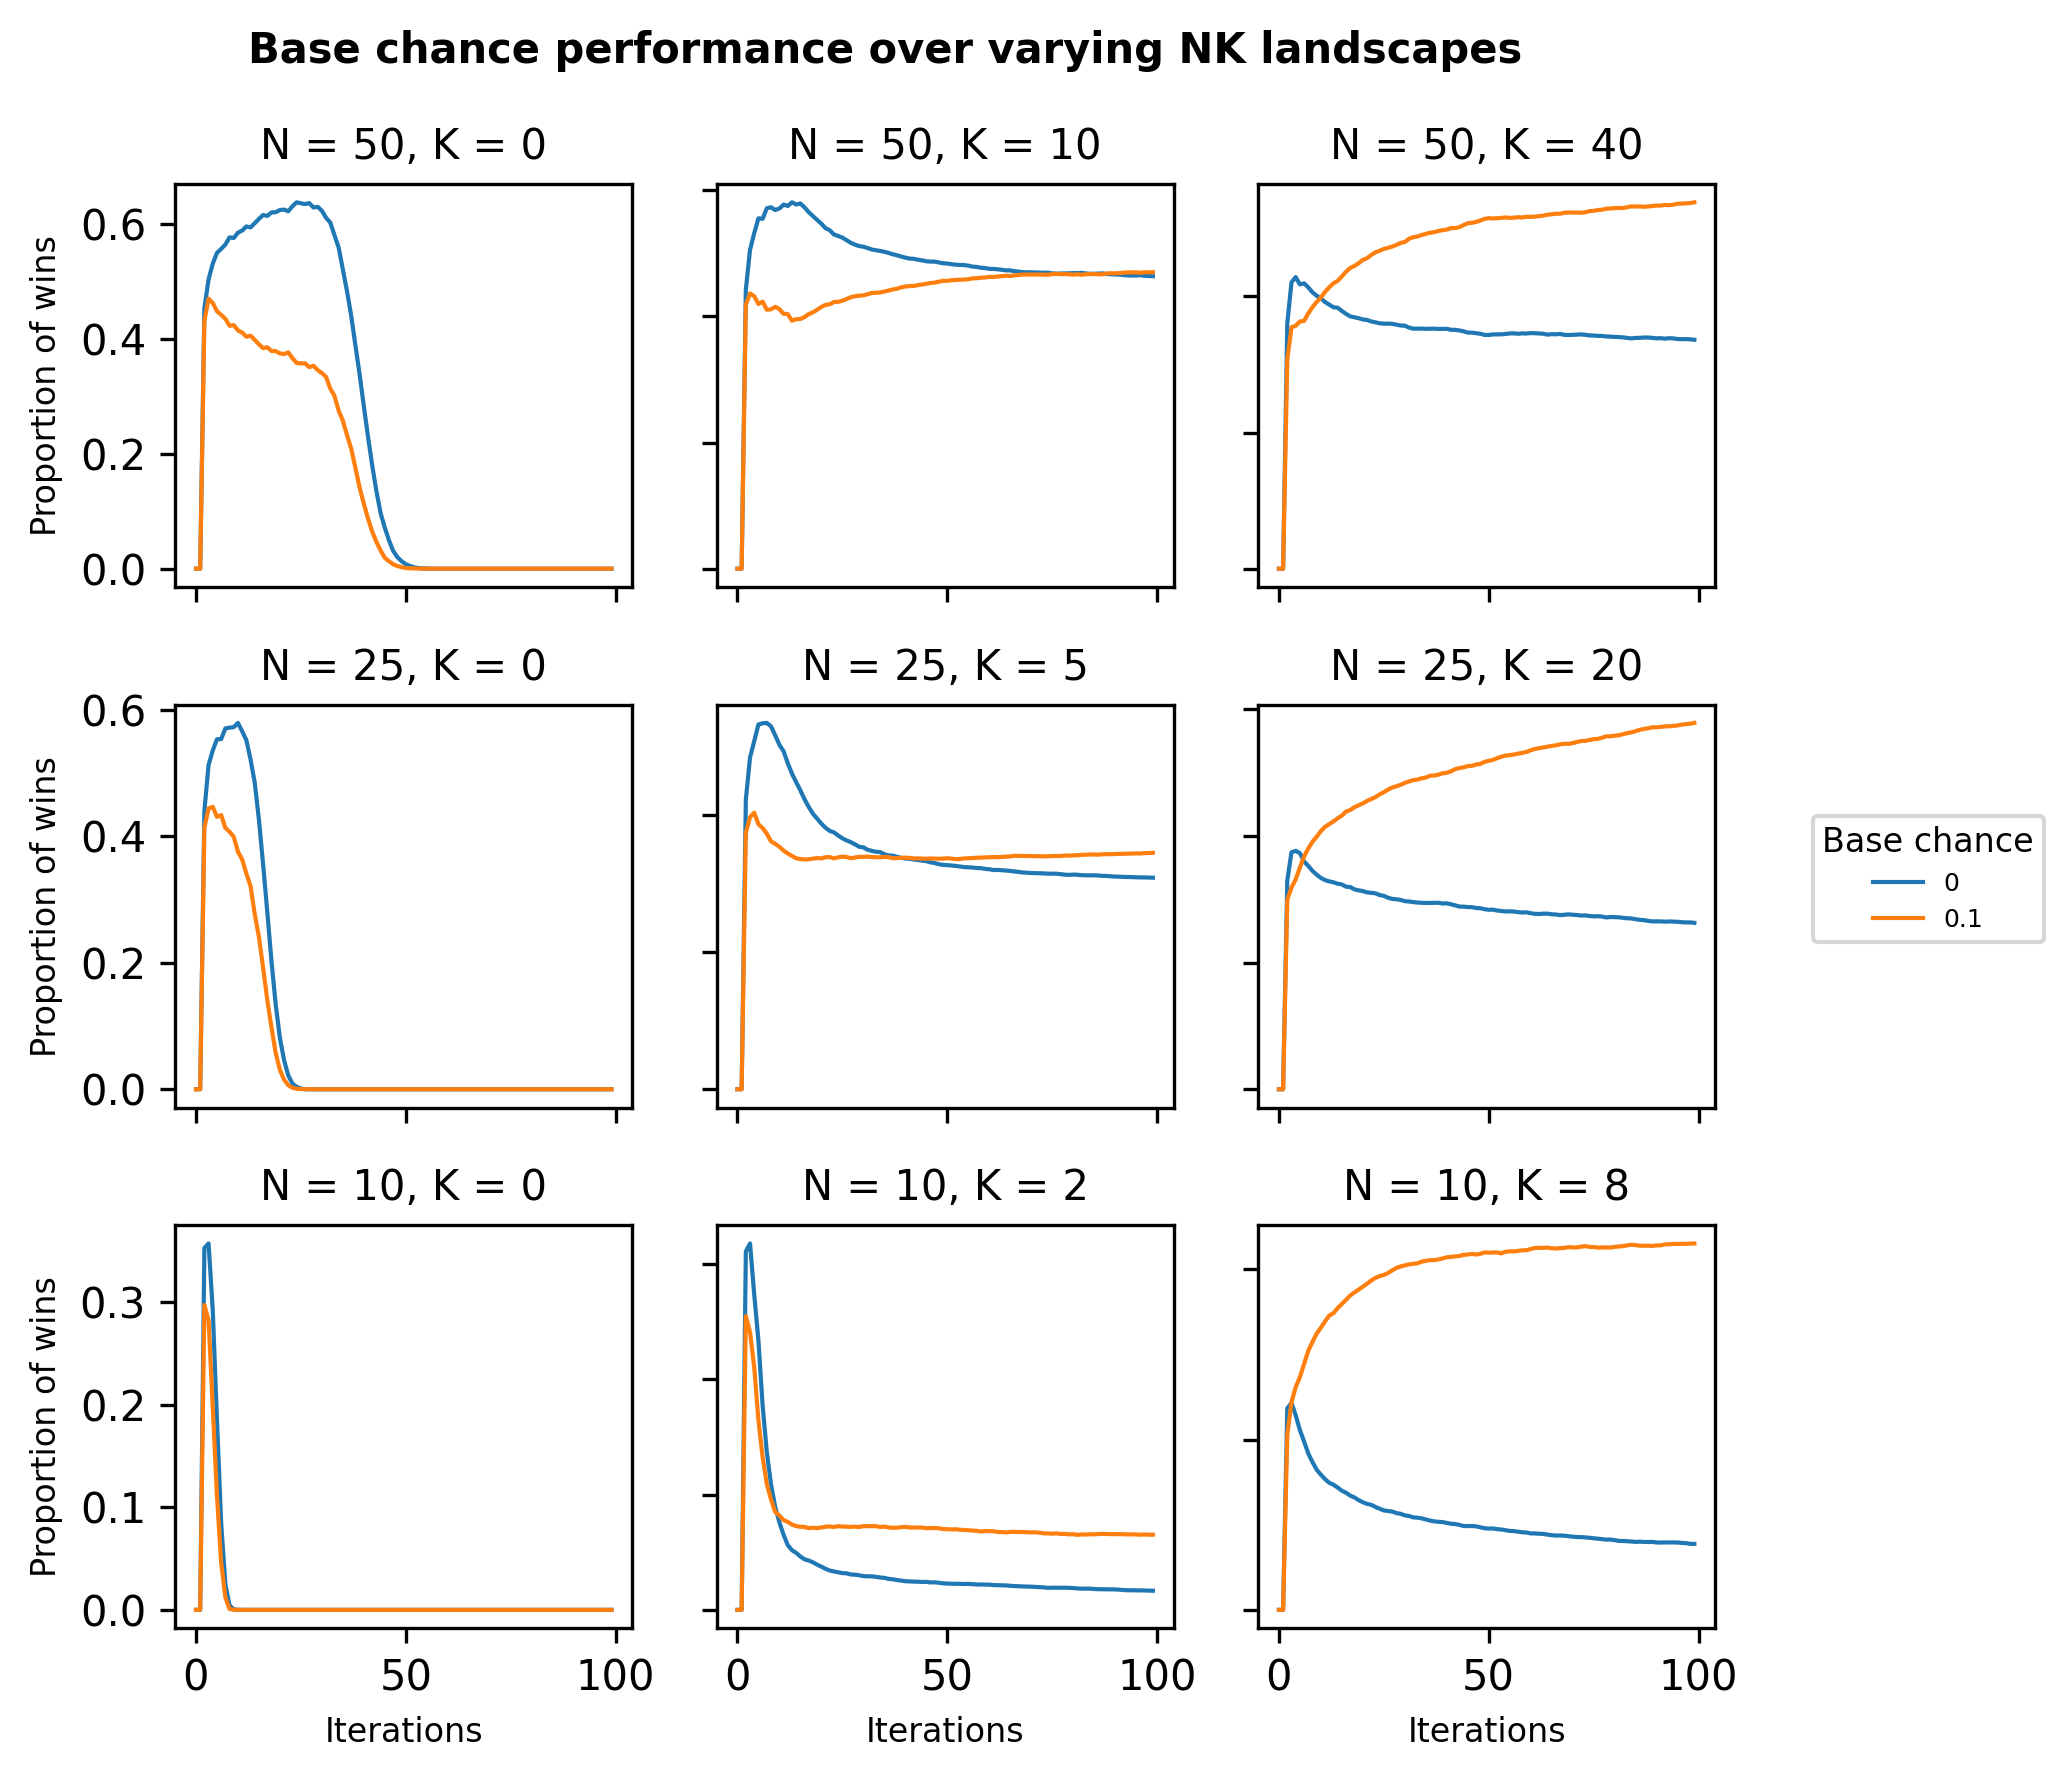

In [301]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(6,6), dpi=300)

n=0

# Iterate over each subplot and plot data
for i in range(3):
    for j in range(3):
        axs[2-i, j].plot(data['data'][n][0]['greedy'], linewidth=1, label='0')  # Example plot, replace with your data and plot function
        axs[2-i, j].plot(data['data'][n][0]['nogreedy'], linewidth=1, label='0.1')
        axs[2-i, j].set_title(f'N = {NKs[n][0]}, K = {NKs[n][1]}', fontsize=10)
        #axs[i, j].legend(title='Base chance', fontsize=6, title_fontsize=8)
        axs[2-i, j].set_xlabel('Iterations', fontsize=8)
        axs[2-i,j].set_ylabel('Proportion of wins', fontsize=8)
        n+=1

# Create a single legend outside the grid
handles, labels = axs[0, 0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='center left', fontsize=6, title='Base chance', title_fontsize=8)
legend.set_bbox_to_anchor((1.00, 0.5))

fig.suptitle('Base chance performance over varying NK landscapes', fontsize=10, fontweight='bold')


for ax in axs.flat:
    ax.label_outer()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [265]:
NKs[4]

(25, 5)

Noise plots

In [269]:
noise_vals = data['noise_levels']

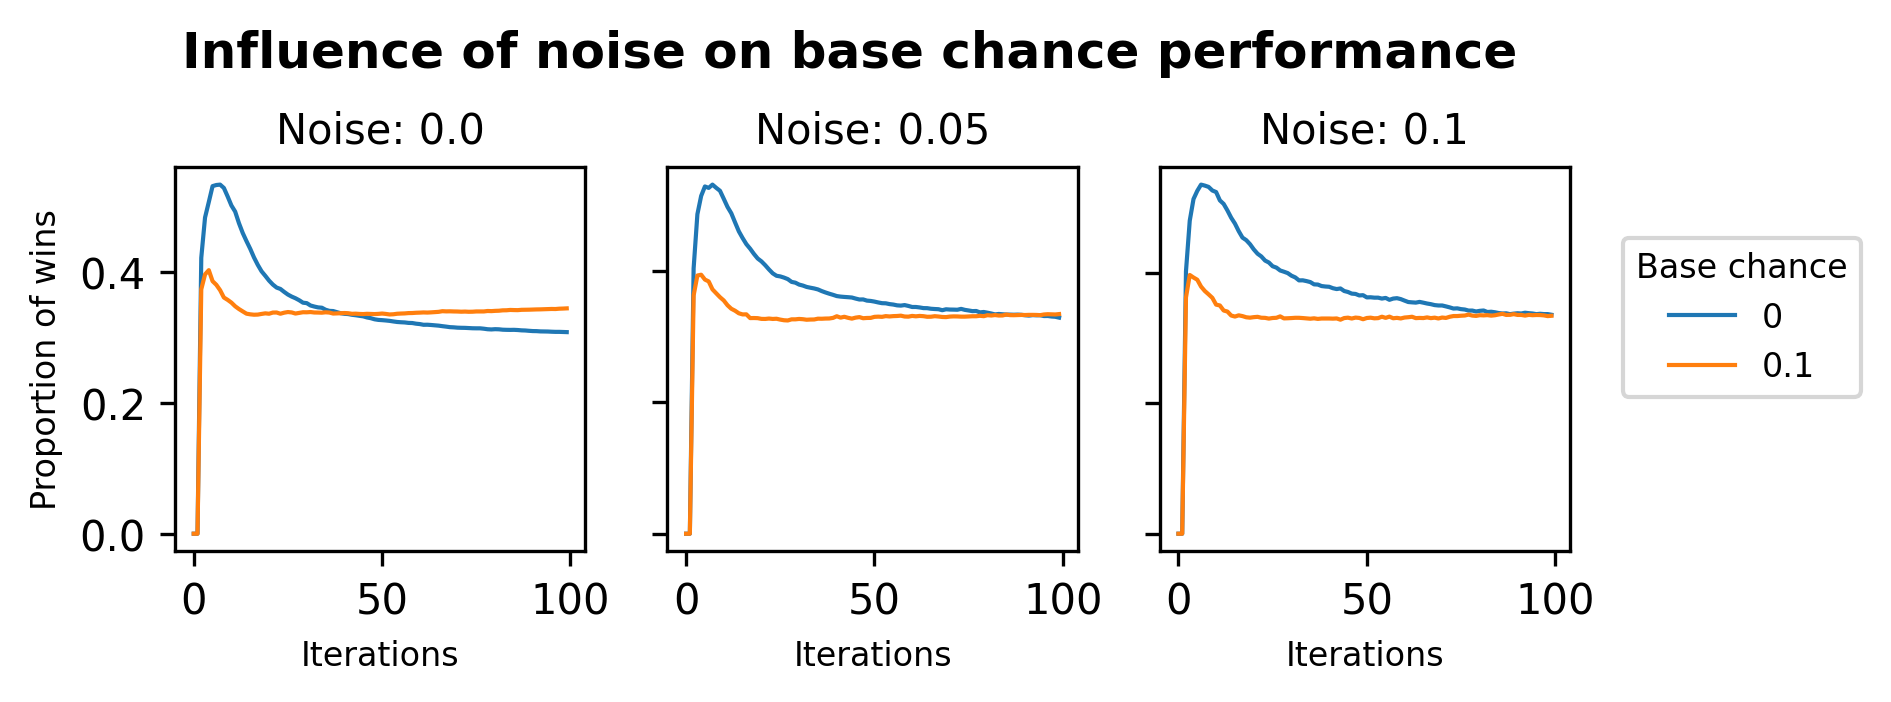

In [304]:
fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=300)

for i in range(3):
        axs[i].plot(data['data'][4][i]['greedy'], linewidth=1, label='0')  # Example plot, replace with your data and plot function
        axs[i].plot(data['data'][4][i]['nogreedy'], linewidth=1, label='0.1')
        axs[i].set_title(f'Noise: {noise_vals[i]}', fontsize=10)
        axs[i].set_xlabel('Iterations', fontsize=8)
        axs[i].set_ylabel('Proportion of wins', fontsize=8)

fig.suptitle('Influence of noise on base chance performance', fontsize=12, fontweight='bold')

# Create a single legend outside the grid
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', fontsize=8, title='Base chance', title_fontsize=8, bbox_to_anchor=(0.92, 0.5))

plt.subplots_adjust(top=0.75)

for ax in axs.flat:
    ax.label_outer()